In [18]:

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/YafetPontoh/dataset_mental_health_description/refs/heads/master/Translated_Combined_Data.csv')
df = df[['translate', 'status']]
df.head()

,translate,status
0,Kecemasan saya memberitahu saya untuk tidak ju...,Anxiety
1,Khawatir saya menderita kanker ovarium. Semaki...,Anxiety
2,Untuk Penderita HA yang memiliki kecemasan yan...,Anxiety
3,"Eye floaters karena stres? Halo, Saya baru-bar...",Anxiety
4,"Ada rasa cemas berlebihan saat ini, .Dan, masi...",Anxiety


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3379 entries, 0 to 3378
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   translate  3379 non-null   object
 1   status     3379 non-null   object
dtypes: object(2)
memory usage: 52.9+ KB


In [5]:
df.describe()

,translate,status
count,3379,3379
unique,3378,7
top,Bagaimana Jika Kinerja Anda Lebih Baik dari ya...,Depression
freq,2,500


In [6]:
df.isnull().sum()

,0
translate,0
status,0


In [7]:
df.value_counts()

,,count
translate,status,
"Bagaimana Jika Kinerja Anda Lebih Baik dari yang Anda Pikirkan? Bukan hal yang aneh jika seseorang berpikir bahwa keadaannya lebih buruk dari yang sebenarnya. Beberapa dari kita pesimis, yang lain memiliki keyakinan yang membatasi: Saya tidak cukup baik, saya tidak layak – kemajuan hanyalah keberuntungan, kemunduran memperkuat keyakinan yang membatasi.\n\n### Perhatikan tanda-tanda positif berikut:\n\n· **Anda merenungkan, dan belajar dari, kemunduran dan kesalahan.** Anda mempunyai pandangan yang seimbang mengenai hal ini dan mengembangkan rencana yang jelas untuk belajar dan terus berkembang. Orang sering kali mengulangi kesalahan yang sama, entah itu mengeluarkan uang terlalu banyak atau memilih pasangan. Orang mempunyai kecenderungan yang kuat untuk mengulangi perilakunya. Namun Anda dapat memilih untuk merespons secara berbeda – dan mencapai hasil yang berbeda\n\n· **Anda sudah jelas mengenai apa yang Anda inginkan – dan alasannya.** Mengetahui apa yang Anda inginkan adalah langkah kunci kedua untuk mencapainya (mengetahui siapa dan apa diri Anda adalah langkah pertama). Mengetahui apa yang Anda inginkan membedakan Anda dari mereka yang menjalani hidup tanpa tujuan.\n\n· **Anda menggunakan waktu dengan bijak.** Kita semua memiliki 168 jam setiap minggu dan pilihan bagaimana menggunakannya. Anda fokus pada apa yang penting, dalam konteks siapa Anda dan apa yang telah Anda pilih untuk dicapai. Anda mempunyai kebiasaan bertanya pada diri sendiri hal apa yang paling efektif yang dapat Anda lakukan saat ini. \n\n· **Anda membuat kemajuan yang konsisten.** Kemajuan yang konsisten adalah pertanda baik. Bahkan ketika tujuan Anda masih jauh, kemajuan rutin – didorong oleh upaya dan pembelajaran yang konsisten – akan membawa Anda ke sana. Selain merencanakan hal-hal lain yang perlu dilakukan, renungkan seberapa jauh kemajuan yang telah Anda capai.\n\n· **Kamu tidak sendirian.** Ada banyak orang yang sendirian di dunia. Jika Anda tidak sendirian, Anda melakukan lebih baik daripada banyak orang lainnya.\n\n· **Anda berkomitmen.** Anda tahu siapa diri Anda dan tentang diri Anda. Tujuan Anda jelas. Mereka menciptakan makna bagi Anda, nilai bagi orang lain, dan warisan untuk masa depan. Hal-hal hebat terjadi ketika tujuan dan lingkungan Anda selaras.\n\n· **Anda mempertimbangkan pendapat orang lain.** Anda mempelajari apa yang masuk akal bagi Anda dan membuang apa yang tidak masuk akal. Anda menjalani hidup Anda, bukan hidup mereka. \n\n· **Anda bersyukur.** Anda secara teratur merenungkan apa yang telah berjalan dengan baik dan – yang terpenting – mengapa hal tersebut berjalan dengan baik. Anda memiliki keterampilan dan kekuatan yang bahkan tidak Anda sadari.\n\n· **Anda asli.** Anda tahu nilai dan keyakinan Anda. Anda membuat keputusan dan mengambil tindakan sesuai dengan keputusan tersebut.\n\nKetika Anda sudah jelas mengenai apa yang ingin Anda capai, dan Anda menggunakan waktu Anda dengan bijak, Anda melakukannya dengan baik – dan lebih baik dari kebanyakan orang! Hal ini benar, meskipun hasilnya belum terlihat.\n\n**Keinginan Asli + Strategi Efektif + Kegigihan Konsisten = Hasil Asli**",Stress,2
Saya telah mengalami depresi berat selama bertahun-tahun tetapi masih ada sedikit api yang tersisa di perut saya. Saya mampu membela diri meskipun merasa buruk tentang diri saya sendiri. Sekarang saya merasa sangat sensitif dan suam-suam kuku bahkan ketika saya tahu saya harus bereaksi. Orang-orang sangat tidak menghormati saya dan saya tidak bereaksi sebagaimana mestinya. Saya akhirnya menjadi cemas dan membeku. Bagaimana cara memperbaikinya? Kehilangan Keunggulan Saya,Depression,1
"Saya telah mengalami kemungkinan depresi selama sekitar 3 tahun sekarang. Saya tidak tahu mengapa hal itu terjadi, dan saya tidak mengerti mengapa hal itu hilang. Tapi itu salah, dan saya tidak ingin menjadi lebih baik. Saya sudah terbiasa dengan hal itu. Ada sejumlah kenyamanan pada perasaan mati rasa, atau sekadar rasa berat. Saya 

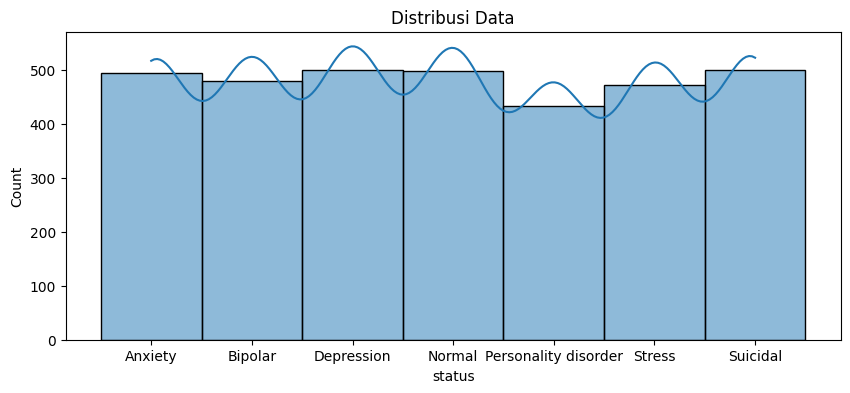

In [8]:
plt.figure(figsize=(10, 4))
sns.histplot(df['status'], kde=True)
plt.title('Distribusi Data')
plt.show()

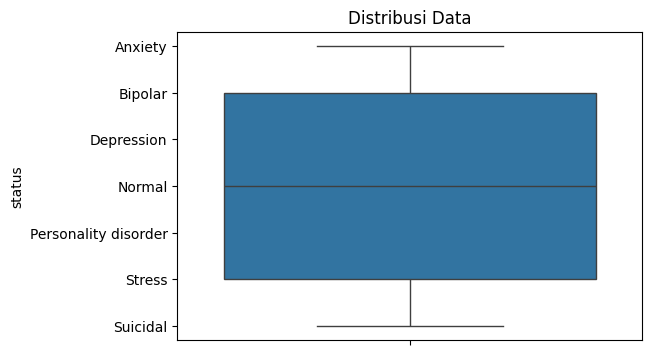

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(df['status'])
plt.title('Distribusi Data')
plt.show()

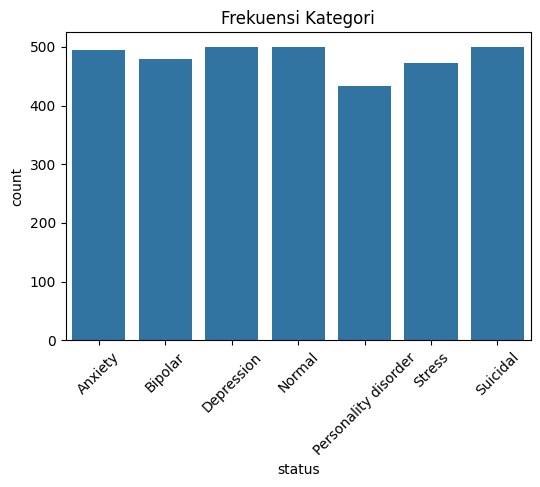

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df)
plt.title('Frekuensi Kategori')
plt.xticks(rotation=45)
plt.show()

In [11]:
df['status'] = df['status'].replace({
    'Anxiety': 'anxiety',
    'Depression': 'depression',
    'Normal': 'normal',
    'Stress': 'stress',
    'Bipolar': 'bipolar',
    'Suicidal': 'suicidal',
    'Personality': 'personality disorder'
})

df = df.rename(columns={'translate': 'text'})


df.head()

,text,status
0,Kecemasan saya memberitahu saya untuk tidak ju...,anxiety
1,Khawatir saya menderita kanker ovarium. Semaki...,anxiety
2,Untuk Penderita HA yang memiliki kecemasan yan...,anxiety
3,"Eye floaters karena stres? Halo, Saya baru-bar...",anxiety
4,"Ada rasa cemas berlebihan saat ini, .Dan, masi...",anxiety


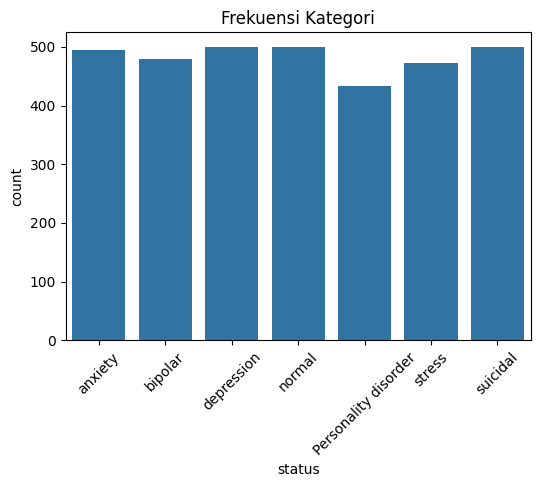

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df)
plt.title('Frekuensi Kategori')
plt.xticks(rotation=45)
plt.show()

In [1]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [13]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [19]:
clean_df = df.copy()
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['text'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

clean_df

,text,status,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Kecemasan saya memberitahu saya untuk tidak ju...,anxiety,Kecemasan saya memberitahu saya untuk tidak ju...,kecemasan saya memberitahu saya untuk tidak ju...,kecemasan saya memberitahu saya untuk tidak ju...,"[kecemasan, saya, memberitahu, saya, untuk, ti...","[kecemasan, memberitahu, jujurrentan, kencan, ...",kecemasan memberitahu jujurrentan kencan kecem...
1,Khawatir saya menderita kanker ovarium. Semaki...,anxiety,Khawatir saya menderita kanker ovarium Semakin...,khawatir saya menderita kanker ovarium semakin...,khawatir saya menderita kanker ovarium semakin...,"[khawatir, saya, menderita, kanker, ovarium, s...","[khawatir, menderita, kanker, ovarium, media, ...",khawatir menderita kanker ovarium media sosial...
2,Untuk Penderita HA yang memiliki kecemasan yan...,anxiety,Untuk Penderita HA yang memiliki kecemasan yan...,untuk penderita ha yang memiliki kecemasan yan...,untuk penderita ha yang memiliki kecemasan yan...,"[untuk, penderita, ha, yang, memiliki, kecemas...","[penderita, ha, memiliki, kecemasan, berbeda, ...",penderita ha memiliki kecemasan berbeda ketaku...
3,"Eye floaters karena stres? Halo, Saya baru-bar...",anxiety,Eye floaters karena stres Halo Saya barubaru i...,eye floaters karena stres halo saya barubaru i...,eye floaters karena stres halo saya barubaru i...,"[eye, floaters, karena, stres, halo, saya, bar...","[eye, floaters, stres, halo, barubaru, menjala...",eye floaters stres halo barubaru menjalani pem...
4,"Ada rasa cemas berlebihan saat ini, .Dan, masi...",anxiety,Ada rasa cemas berlebihan saat ini Dan masih a...,ada rasa cemas berlebihan saat ini dan masih a...,ada rasa cemas berlebihan saat ini dan masih a...,"[ada, rasa, cemas, berlebihan, saat, ini, dan,...",[cemas],cemas
...,...,...,...,...,...,...,...,...
3374,setiap hal kecil menunjukkan kepada saya bahwa...,suicidal,setiap hal kecil menunjukkan kepada saya bahwa...,setiap hal kecil menunjukkan kepada saya bahwa...,setiap hal kecil menunjukkan kepada saya bahwa...,"[setiap, hal, kecil, menunjukkan, kepada, saya...","[membutuhkan, rekan, timku, permainan, mainkan...",membutuhkan rekan timku permainan mainkan tiba...
3375,"Ibu dan Ayah, Kalian tidak akan pernah tahu pe...",suicidal,Ibu dan Ayah Kalian tidak akan pernah tahu per...,ibu dan ayah kalian tidak akan pernah tahu per...,ibu dan ayah kalian tidak akan pernah tahu per...,"[ibu, dan, ayah, kalian, tidak, akan, pernah, ...","[ayah, persis, rasakan, saatsaat, menjelang, c...",ayah persis rasakan saatsaat menjelang catatan...
3376,Saya bermimpi tentang dia. Kakinya patah dan y...,suicidal,Saya bermimpi tentang dia Kakinya patah dan ya...,saya bermimpi tentang dia kakinya patah dan ya...,saya bermimpi tentang dia kakinya patah dan ya...,"[saya, bermimpi, tentang, dia, kakinya, patah,...","[bermimpi, kakinya, patah, bertemu, menghiburn...",bermimpi kakinya patah bertemu menghiburnya me...
3377,Aku tidak bisa terus hidup seperti ini. Aku me...,suicidal,Aku tidak bisa terus hidup seperti ini Aku men...,aku tidak bisa terus hidup seperti ini aku men...,aku tidak bisa terus hidup seperti ini aku men...,"[aku, tidak, bisa, terus, hidup, seperti, ini,...","[hidup, menderita, ibuku, menyayangiku]",hidup menderita ibuku menyayangiku


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

texts = clean_df['text_akhir']
labels = clean_df['status']

# Encode label ke angka
label_encoder = LabelEncoder()
y_integers = label_encoder.fit_transform(labels) # Use y_integers here for class weight calculation
y = to_categorical(y_integers) # Convert y_integers to one-hot encoded for model training

# Tokenisasi teks
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding
maxlen = 30  # max panjang kalimat
X = pad_sequences(sequences, maxlen=maxlen)

# Train-test split
# Use y_integers for stratification since stratify works with integer labels
X_train, X_test, y_train_onehot, y_test_onehot = train_test_split(X, y, test_size=0.2, stratify=y_integers, random_state=42) # Split using one-hot encoded labels for training, but stratify using integer labels

# Hitung class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_integers),
    y=y_integers # Use y_integers for computing class weights
)

# Buat dict dari class weight
class_weight_dict = dict(zip(np.unique(y_integers), class_weights))


# Model LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=maxlen),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax'),  # multiclass
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Training
# Use the correct parameter name 'class_weight'
model.fit(X_train, y_train_onehot, epochs=30, batch_size=32, validation_data=(X_test, y_test_onehot), class_weight=class_weight_dict)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.2072 - loss: 1.8671 - val_accuracy: 0.3062 - val_loss: 1.7139
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3386 - loss: 1.6349 - val_accuracy: 0.4009 - val_loss: 1.4938
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5399 - loss: 1.2028 - val_accuracy: 0.5399 - val_loss: 1.3285
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7674 - loss: 0.7018 - val_accuracy: 0.5666 - val_loss: 1.4371
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8640 - loss: 0.4390 - val_accuracy: 0.5533 - val_loss: 1.4829
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9303 - loss: 0.2513 - val_accuracy: 0.5311 - val_loss: 1.8802
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9493 - loss: 0.1751 - val_accuracy: 0.5325 - val_loss: 1.8269
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9783 - loss: 0.0907 - val_accuracy: 0.5340 - v

In [27]:
import numpy as np

# Contoh input teks baru
new_text = ["kecemasan saya memberitahu saya untuk tidak "]  # kamu bisa ganti ini

# Tokenisasi dan padding seperti saat training
sequence = tokenizer.texts_to_sequences(new_text)
# ganti sesuai maxlen training
padded_sequence = pad_sequences(sequence, maxlen=maxlen)

# Lakukan prediksi
pred_probs = model.predict(padded_sequence)
pred_class = np.argmax(pred_probs, axis=1)

# Konversi label numerik ke label asli
pred_label = label_encoder.inverse_transform(pred_class)

# Tampilkan hasil
print(f"Teks: {new_text[0]}")
print(f"Prediksi Kategori: {pred_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Teks: kecemasan saya memberitahu saya untuk tidak 
Prediksi Kategori: normal
